#Titanic Data Analysis

In [ ]:
#Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Load the Titanic Dataset from Seaborn

titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


## Observations ->



*   The dataset contains both categorical and numerical values

**Check for missing values in the dataset**




In [ ]:
# check the missing values in the dataset

titanic.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


##Look at the summary statistics before cleaning the dataset for Numerical features in the dataset


In [ ]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Look at the Frequency distribution for categorical values


In [ ]:
titanic.describe(include = ['category'])

,class,deck
count,891,203
unique,3,7
top,Third,C
freq,491,59


##Handling Missing values in the dataset

In [ ]:
#Dropping Deck due to many Missing values

if 'deck' in titanic.columns:
  titanic = titanic.drop(columns = ['deck'])

titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [ ]:
#impute missing values in Age with median

titanic['age'] = titanic['age'].fillna(titanic['age'].median())
titanic['age'].isnull().sum()

np.int64(0)

In [ ]:
# impute the missing values in embarked

titanic['embarked'] = titanic['embarked'].fillna(titanic['embarked'].mode()[0])
titanic['embarked'].isnull().sum()

np.int64(0)

In [ ]:
#Drop the rows of missing values in Embark_town is missing

titanic = titanic.dropna(subset =['embark_town'])
titanic['embark_town'].isnull().sum()

np.int64(0)

In [ ]:
titanic.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
embarked,0
class,0
who,0


In [ ]:
#Dataset after handling missing values

titanic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     889 non-null    int64   
 1   pclass       889 non-null    int64   
 2   sex          889 non-null    object  
 3   age          889 non-null    float64 
 4   sibsp        889 non-null    int64   
 5   parch        889 non-null    int64   
 6   fare         889 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        889 non-null    category
 9   who          889 non-null    object  
 10  adult_male   889 non-null    bool    
 11  embark_town  889 non-null    object  
 12  alive        889 non-null    object  
 13  alone        889 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(5)
memory usage: 86.1+ KB


##Data type conversion

Datatype conversion is crucial for data analysis,

*   Categorical data : Columns like SEX,EMBARKED,WHO should be converted into Categorical data




In [ ]:
titanic['sex'] = titanic['sex'].astype('category')
titanic['embarked'] = titanic['embarked'].astype('category')
titanic['who'] = titanic['who'].astype('category')

titanic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     889 non-null    int64   
 1   pclass       889 non-null    int64   
 2   sex          889 non-null    category
 3   age          889 non-null    float64 
 4   sibsp        889 non-null    int64   
 5   parch        889 non-null    int64   
 6   fare         889 non-null    float64 
 7   embarked     889 non-null    category
 8   class        889 non-null    category
 9   who          889 non-null    category
 10  adult_male   889 non-null    bool    
 11  embark_town  889 non-null    object  
 12  alive        889 non-null    object  
 13  alone        889 non-null    bool    
dtypes: bool(2), category(4), float64(2), int64(4), object(2)
memory usage: 68.2+ KB


##Remove Duplicates

In [ ]:
# Find Duplicates
duplicates = titanic.duplicated().sum()
duplicates

np.int64(116)

In [ ]:
#remove duplicates if any?

if duplicates>0:
  titanic = titanic.drop_duplicates()

#again check for duplicates

titanic.duplicated().sum()

np.int64(0)

In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 773 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     773 non-null    int64   
 1   pclass       773 non-null    int64   
 2   sex          773 non-null    category
 3   age          773 non-null    float64 
 4   sibsp        773 non-null    int64   
 5   parch        773 non-null    int64   
 6   fare         773 non-null    float64 
 7   embarked     773 non-null    category
 8   class        773 non-null    category
 9   who          773 non-null    category
 10  adult_male   773 non-null    bool    
 11  embark_town  773 non-null    object  
 12  alive        773 non-null    object  
 13  alone        773 non-null    bool    
dtypes: bool(2), category(4), float64(2), int64(4), object(2)
memory usage: 59.4+ KB


## Data Analysis by Visualization
Data Analysis by Visualization is a critical step in understanding the underlying patterns, anomalies, and relationships within a dataset.


###Uni-Variate Analysis
Univariate analysis focuses on examining one variable at a time. It helps in understanding the distribution, central tendency, and variability of individual variables.

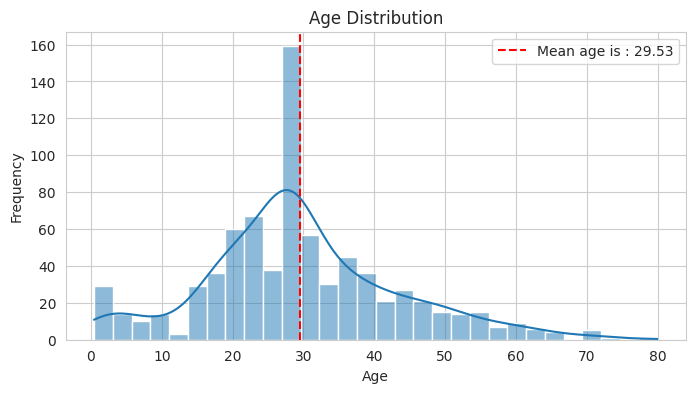

In [ ]:
#Age distribution plot


# set the asthetic style of the plots
sns.set_style('whitegrid')

#Create the figure and axes
plt.figure(figsize=(8,4))


#plot the distribution of ages
sns.histplot(titanic['age'],kde=True,bins = 30)

#add titles and labels
plt.title("Age Distribution")
plt.xlabel('Age')
plt.ylabel('Frequency')

#add vertical line at the mean age
mean_age=titanic['age'].mean()
plt.axvline(mean_age,color = 'red',linestyle = '--',label = f'Mean age is : {mean_age:.2f}')

#add a legend
plt.legend()

#show the plot
plt.show()

[]

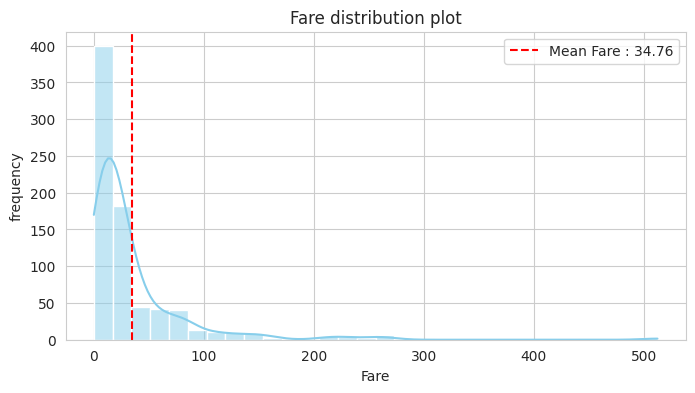

In [ ]:
#Fare Distribution plot

sns.set_style('whitegrid')

plt.figure(figsize=(8,4))

sns.histplot(titanic['fare'],color='skyblue',kde=True,bins=30)


fares_mean = titanic['fare'].mean()
plt.axvline(fares_mean,linestyle = '--',color='r',label = f'Mean Fare : {fares_mean:.2f}')

plt.title("Fare distribution plot")
plt.xlabel('Fare')
plt.ylabel('frequency')

plt.legend()

plt.plot()

/tmp/ipython-input-48-1541698425.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = titanic['sex'],palette='Set2')


Text(0, 0.5, 'Count')

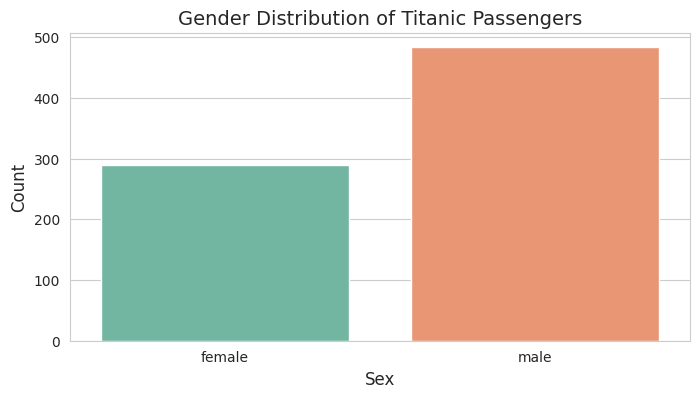

In [ ]:
#Gender Distribution plot

# Set the aesthetic style of the plots
#sns.set_style("darkgrid")

# Create the figure and the axes
plt.figure(figsize=(8, 4))

# Plot the gender distribution with an improved color palette and aesthetics
sns.countplot(x = titanic['sex'],palette='Set2')

# Add titles and labels
plt.title('Gender Distribution of Titanic Passengers', fontsize=14)
plt.xlabel('Sex', fontsize=12)
plt.ylabel('Count', fontsize=12)

were there any child pasengers? if so what was their percentage when compared with men and women

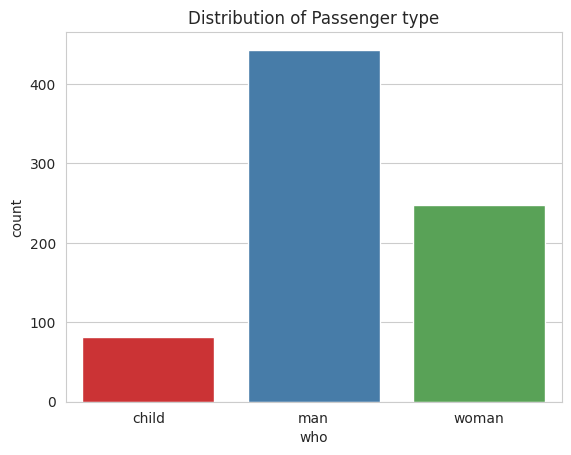

In [ ]:
plt.title('Distribution of Passenger type')
sns.countplot(x = 'who', hue = 'who',data = titanic, palette= 'Set1')
plt.show()

###Bi-Variate Analysis
Bivariate analysis refers to the statistical analysis of two variables, with the aim of determining the empirical relationship between them

Who has better survival rate ? -Young or Old?
who paid more fee Young or old?


In [ ]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


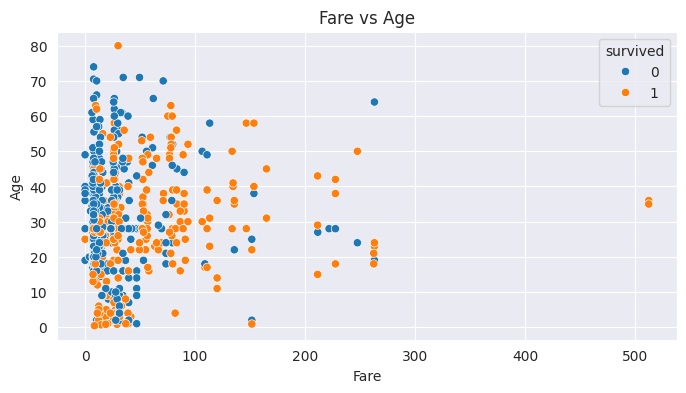

In [ ]:
sns.set_style("darkgrid")

plt.figure(figsize = (8,4))

plt.title("Fare vs Age")
plt.xlabel('Fare')
plt.ylabel('Age')
sns.scatterplot(x = 'fare', y = 'age', data = titanic, hue = 'survived')
plt.show()

Interpretation:
This scatter plot represents a bivariate analysis of Age vs Fare, categorized by the survival status of passengers on the Titanic. The data points are color-coded based on whether the passengers survived (orange) or not (blue).

- Higher fares seem to be more associated with survival (orange dots).
- Both survivors and non-survivors are distributed across all age groups.
- There is a notable cluster of young children (ages 0-10) who survived.
- Survivors (orange) are more dispersed across different fare ranges, especially at higher fares.
- Non-survivors (blue) are densely clustered at lower fare ranges, indicating that lower fare passengers had a lower survival rate.

From the bivariate scatter plot, we observed age and fare relate to survival status. Can we delve deeper into how age/fare alone is distributed among those who survived and those who didn't?

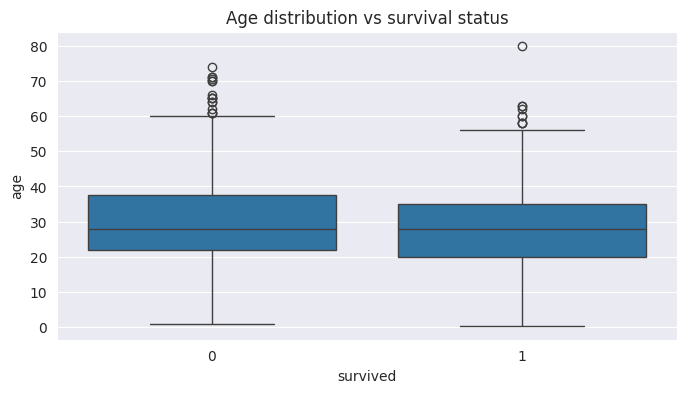

In [ ]:
sns.set_style("darkgrid")

plt.figure(figsize = (8,4))

plt.title("Age distribution vs survival status")
plt.xlabel('survived')
plt.ylabel('age')

sns.boxplot(x = 'survived', y='age', data = titanic)
plt.show()

Interpretation:
- Both survivors and non-survivors have similar median ages, around 28-30 years
- The central age groups (middle 50%) for both survivors and non-survivors are quite similar, indicating that the majority of people fall into the same age range for both groups.
- There are more older individuals who did not survive, shown as outliers in the non-survivor group, confirming the scatter plot where we saw older non-survivors.
- Non-survivors have a slightly wider range of ages, meaning there is more variation in the ages of people who didn't survive.
- Both the scatter plot and box plot indicate that more young children survived, shown by the lower age range in survivors.

Fare distribution vs Survival Status

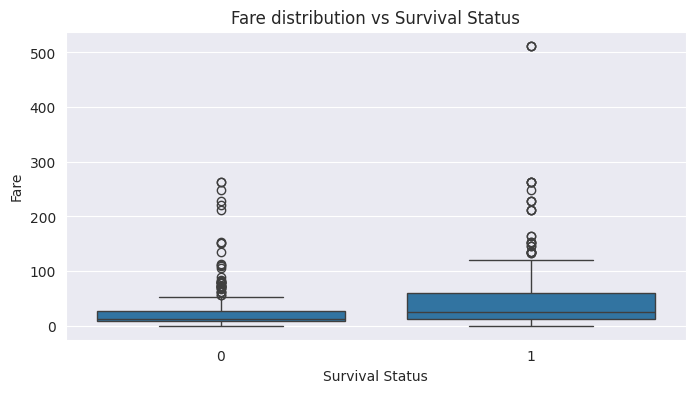

In [ ]:
sns.set_style("darkgrid")

plt.figure(figsize = (8,4))

plt.title("Fare distribution vs Survival Status")
plt.xlabel('Survival Status')
plt.ylabel('Fare')

sns.boxplot(x = 'survived', y='fare', data = titanic)
plt.show()

Interpretation:
- The median fare for survivors is significantly higher than for non-survivors. This confirms the scatter plot observation that higher fares are associated with higher survival rates.
- Survivors have a broader interquartile range (IQR), indicating a wider spread of fares among those who survived.
- Both survivors and non-survivors have fare outliers, but the outliers for survivors are higher, reaching up to 500 units. This supports the scatter plot finding that some high fare passengers survived.
- The majority of non-survivors paid lower fares, as shown by the lower median and tighter IQR. This aligns with the scatter plot where many non-survivors paid fares below 100 units.
- The overall spread of fares (range) is wider for survivors compared to non-survivors, showing that those who paid higher fares had a better chance of surviving.

###Multivariate Analysis


Multivariate analysis refers to a set of statistical techniques used to analyze data that involves more than two variables.

Example:

In the context of the Titanic dataset, multivariate analysis can be applied to predict the likelihood of survival based on several factors, such as age, fare, passenger class, and gender.


Find out the highly correlated variables

This can be done using 2 ways:
- Heat Maps # only for numerical values in the data set
- Pair Plots

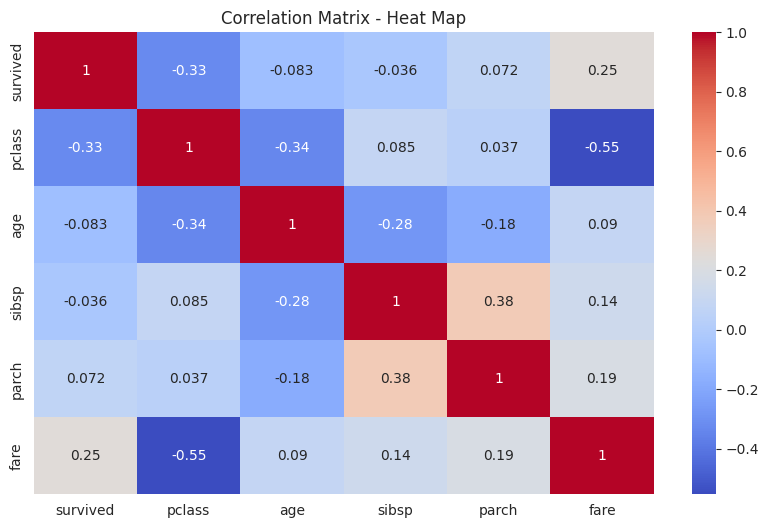

In [ ]:
#correlation matrix -HeatMap

plt.figure(figsize= (10,6))

#select only numerical columns for the correlation matrix
numericalcolumns = titanic.select_dtypes(include = [np.number])

sns.heatmap(numericalcolumns.corr(),annot=True,cmap= 'coolwarm')

plt.title('Correlation Matrix - Heat Map')
plt.show()


Interpretation:
- Positive correlation (0.25) between survival and fare: Higher fares are associated with higher survival likelihood.
- Negative correlation (-0.33) between survival and passenger class: Higher-class passengers were more likely to survive.
- Weak correlations between survival and age, siblings/spouses aboard (sibsp), and parents/children aboard (parch).
- Strong negative correlation (-0.55) between fare and passenger class: Higher classes paying higher fares.
- Negative correlation (-0.34) between age and passenger class: Older passengers tend to be in higher classes.
- Moderate positive correlation (0.38) between siblings/spouses aboard (sibsp) and parents/children aboard (parch), indicating families traveling together.

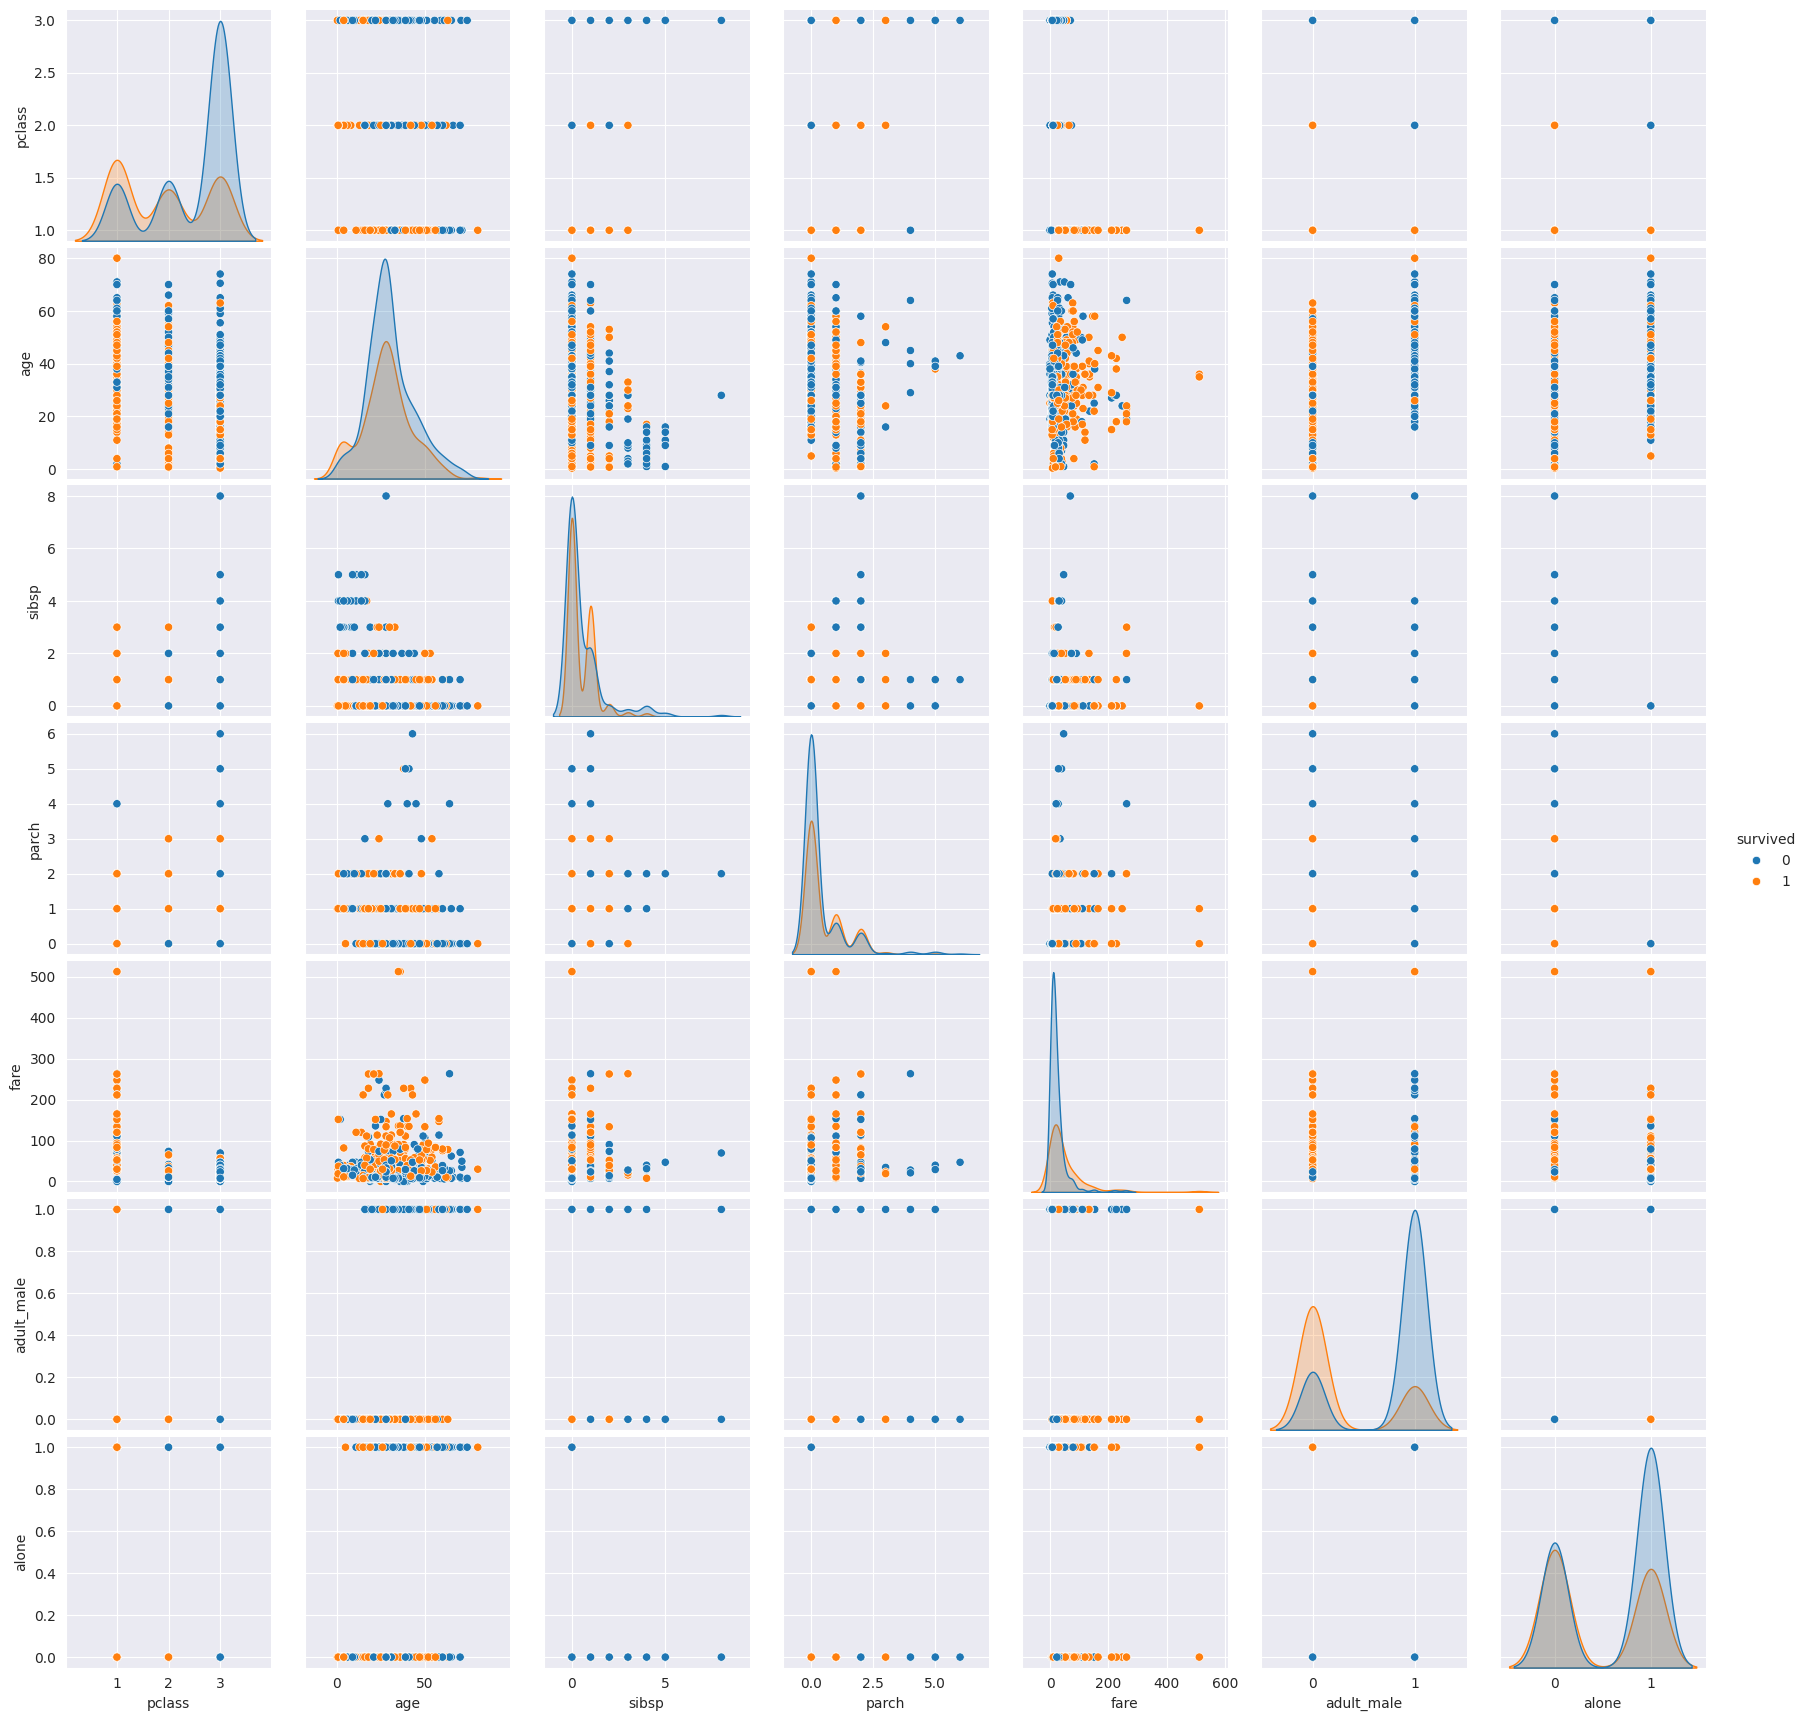

In [ ]:
#Visualizing the relation ship using pair plot

sns.pairplot(titanic,hue ='survived')

plt.show()

##  Outlier Detection

Importance of Handling Outliers

Outliers are data points that significantly deviate from other observations in the dataset. They can arise due to various reasons, including measurement errors, data entry errors, or genuine variability in the data.

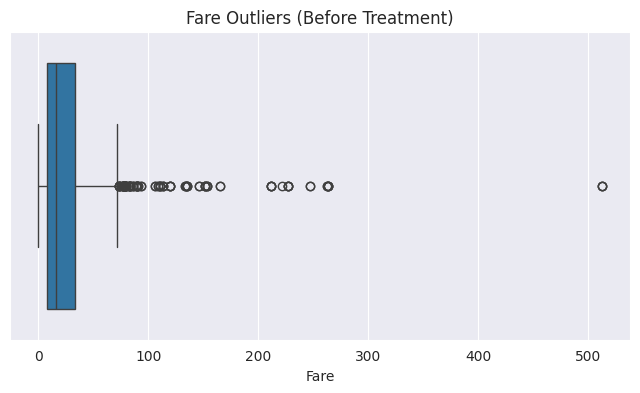

number of outliers in fare 100


In [ ]:
# visualizing outliers in Fare before treatment

plt.figure(figsize =(8,4))
plt.title('Fare Outliers (Before Treatment)')
plt.xlabel('Fare')

sns.boxplot(x = titanic['fare'])
plt.show()

#identifying number of outliers using IQR method

#caluculating Q1,Q3

Q1 = titanic['fare'].quantile(0.25)
Q3 = titanic['fare'].quantile(0.75)

IQR = Q3-Q1
lower_bound = Q1 - 1.5 * (IQR)
upper_bound = Q3 + 1.5 * (IQR)

fare_outliers = titanic[(titanic['fare']<lower_bound) | (titanic['fare'] > upper_bound)]

print(f'number of outliers in fare {len(fare_outliers)}')

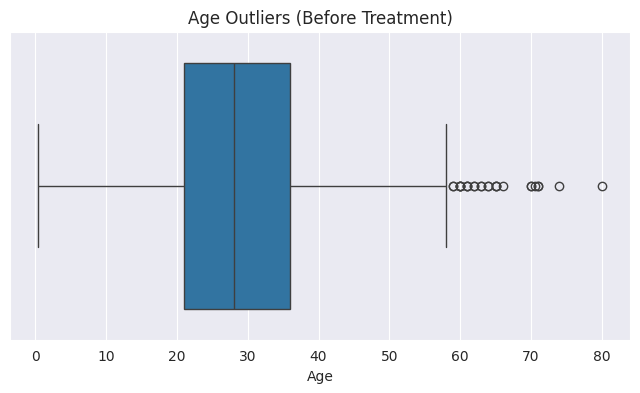

number of outliers in fare 26


In [ ]:
# visualizing outliers in Age before treatment

plt.figure(figsize =(8,4))
plt.title('Age Outliers (Before Treatment)')
plt.xlabel('Age')

sns.boxplot(x = titanic['age'])
plt.show()

#identifying number of outliers using IQR method

#caluculating Q1,Q3

Q1 = titanic['age'].quantile(0.25)
Q3 = titanic['age'].quantile(0.75)

IQR = Q3-Q1
lower_bound = Q1 - 1.5 * (IQR)
upper_bound = Q3 + 1.5 * (IQR)

age_outliers = titanic[(titanic['age']<lower_bound) | (titanic['age'] > upper_bound)]

print(f'number of outliers in fare {len(age_outliers)}')

## Handling Outliers

Once identified, outliers can be handled through various strategies, depending on their nature and impact on the analysis:

1. **Removing Outliers:** This strategy involves excluding outliers from the dataset entirely. It is appropriate when outliers are determined to be errors or when they do not contribute meaningfully to the analysis.
Caution: Might lead to the loss of valuable information.

2. **Transforming Outliers:** In some cases, outliers can be transformed to reduce their impact - log transformation, square root transformation, or winsorizing or capping(replacing outliers with the nearest non-outlier value)

3. **Treating Outliers as Separate Categories:** Categorizing outliers separately to investigate these data points as distinct segments with unique characteristics.

4. **Imputation:** In some cases, particularly in predictive modeling, outliers can be replaced with more representative values, such as the median or mean of the non-outlier data.

The choice of strategy for handling outliers should be guided by the context of the analysis, the significance of the outliers, and the overall goals of the research.

**How are we treating the outliers?**

Capping - Adjusting the values so that any value above the upper bound is set to the upper bound, and any value below the lower bound is set to the lower bound.

**Why choose this method?**

- Capping helps to limit the influence of extreme values, making the dataset more stable for analysis and modeling.
- This method is straightforward and easy to implement, ensuring that all data points fall within a reasonable range without needing to remove them.
- It allows us to keep all data points, maintaining the size and integrity of the dataset while controlling the impact of outliers.


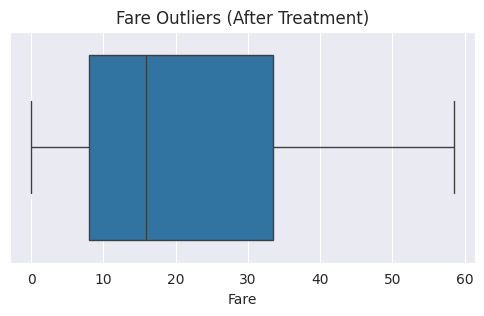

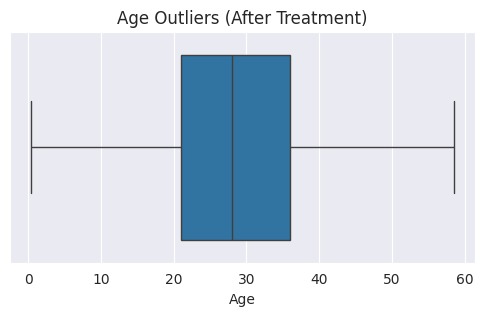

In [ ]:
#Treating the outliers by capping
titanic['fare'] = titanic['fare'].apply(lambda x: lower_bound if x<lower_bound else (upper_bound if x>upper_bound else x))
titanic['age'] = titanic['age'].apply(lambda x: lower_bound if x<lower_bound else (upper_bound if x>upper_bound else x))

# Visualizing outliers in 'Fare' after treatment
plt.figure(figsize=(6, 3))
sns.boxplot(x=titanic['fare'])
plt.title('Fare Outliers (After Treatment)')
plt.xlabel('Fare')
plt.show()

# Visualizing outliers in 'Age' after treatment
plt.figure(figsize=(6, 3))
sns.boxplot(x=titanic['age'])
plt.title('Age Outliers (After Treatment)')
plt.xlabel('Age')
plt.show()

##Feature Engineering

In [111]:
# Feature Engineering

# Converting categorical features (4 columns) to numerical using one-hot encoding
titanic = pd.get_dummies(titanic, columns=['sex', 'embarked', 'class', 'who'], drop_first=True)
titanic.head()

,survived,pclass,age,sibsp,parch,fare,adult_male,embark_town,alive,alone,sex_male,embarked_Q,embarked_S,class_Second,class_Third,who_man,who_woman
0,0,3,22.0,1,0,7.250,True,Southampton,no,False,True,False,True,False,True,True,False
1,1,1,38.0,1,0,58.500,False,Cherbourg,yes,False,False,False,False,False,False,False,True
2,1,3,26.0,0,0,7.925,False,Southampton,yes,True,False,False,True,False,True,False,True
3,1,1,35.0,1,0,53.100,False,Southampton,yes,False,False,False,True,False,False,False,True
4,0,3,35.0,0,0,8.050,True,Southampton,no,True,True,False,True,False,True,True,False


###Creating New Features

Feature engineering also involves creating new features from existing ones to capture additional information. Here are a few examples of how we can create new features in the Titanic dataset:

#### 1. Family Size

The Titanic dataset contains two columns, `sibsp` (number of siblings/spouses aboard) and `parch` (number of parents/children aboard). By combining these two features, we can create a new feature called `Family_Size`, which represents the total number of family members traveling together:

- **Formula:**
  $$
  \text{Family_Size} = \text{sibsp} + \text{parch} + 1
  $$
  (The +1 accounts for the passenger themselves.)

#### 2. Is Alone

Using the `Family_Size` feature, we can create a binary feature called `Is_Alone`, which indicates whether a passenger was traveling alone. This feature can be helpful in understanding survival rates, as being alone or part of a larger family may influence outcomes.

- **Formula:**
  $$
  \text{Is_Alone} =
  \begin{cases}
  1 & \text{if Family_Size} = 1 \\
  0 & \text{otherwise}
  \end{cases}
  $$

#### 3. Fare Per Person

The `fare` feature represents the total fare paid by a passenger’s family or group. To gain insight into the financial burden per individual, we can create a new feature called `Fare_Per_Person` by dividing the total fare by the `Family_Size`.

- **Formula:**
  $$
  \text{Fare_Per_Person} = \frac{\text{fare}}{\text{Family_Size}}
  $$

In [116]:
# Creating new feature 'Family_Size'
titanic['Family_Size'] = titanic['sibsp'] + titanic['parch'] + 1

# Creating new feature 'Is_Alone'
titanic['Is_Alone'] = (titanic['Family_Size'] == 1).astype(int)

# Creating new feature 'Fare_Per_Person'
titanic['Fare_Per_Person'] = titanic['fare'] / titanic['Family_Size']

# Display the first few rows of the transformed dataset
titanic.head()

,survived,pclass,age,sibsp,parch,fare,adult_male,embark_town,alive,alone,sex_male,embarked_Q,embarked_S,class_Second,class_Third,who_man,who_woman,Family_Size,Is_Alone,Fare_Per_Person
0,0,3,22.0,1,0,7.250,True,Southampton,no,False,True,False,True,False,True,True,False,2,0,3.625
1,1,1,38.0,1,0,58.500,False,Cherbourg,yes,False,False,False,False,False,False,False,True,2,0,29.250
2,1,3,26.0,0,0,7.925,False,Southampton,yes,True,False,False,True,False,True,False,True,1,1,7.925
3,1,1,35.0,1,0,53.100,False,Southampton,yes,False,False,False,True,False,False,False,True,2,0,26.550
4,0,3,35.0,0,0,8.050,True,Southampton,no,True,True,False,True,False,True,True,False,1,1,8.050


### Visualizing the New Features

Visualizations can greatly aid our understanding of the distribution and impact of the newly created features. Here are some suggested visualizations:

#### Family Size Distribution

- A count plot can show the distribution of the `Family_Size` feature, helping us understand how many passengers traveled alone versus with family members.

#### Is Alone Distribution

- A count plot of the `Is_Alone` feature provides insight into the proportion of passengers who were traveling alone, which could correlate with survival rates.

#### Fare Per Person Distribution

- A histogram with a kernel density estimate (KDE) overlay for the `Fare_Per_Person` feature allows us to visualize the distribution of fare expenses per individual, providing insights into the economic backgrounds of the passengers.


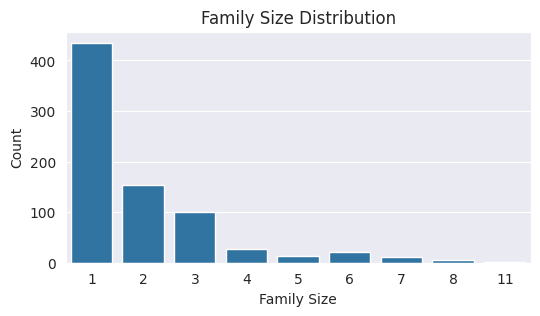

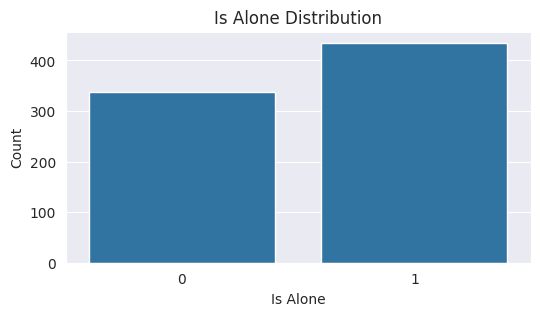

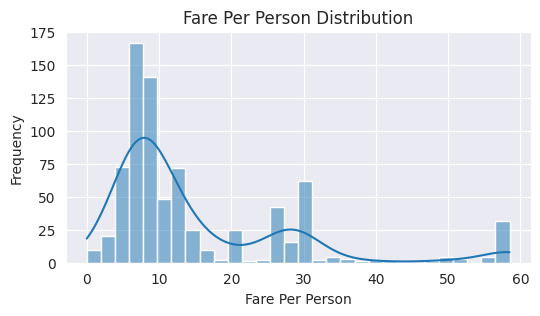

In [117]:
# Visualizing the new features
# Family Size Distribution
plt.figure(figsize=(6, 3))
sns.countplot(x='Family_Size', data=titanic)
plt.title('Family Size Distribution')
plt.xlabel('Family Size')
plt.ylabel('Count')
plt.show()

# Is Alone Distribution
plt.figure(figsize=(6, 3))
sns.countplot(x='Is_Alone', data=titanic)
plt.title('Is Alone Distribution')
plt.xlabel('Is Alone')
plt.ylabel('Count')
plt.show()

# Fare Per Person Distribution
plt.figure(figsize=(6, 3))
sns.histplot(titanic['Fare_Per_Person'], bins=30, kde=True)
plt.title('Fare Per Person Distribution')
plt.xlabel('Fare Per Person')
plt.ylabel('Frequency')
plt.show()


#### Interpretation:

**Family Size Distribution:**
- The majority of passengers were traveling alone, as indicated by the highest count for a family size of 1.
- Family sizes of 2 and 3 also have notable counts, suggesting a significant number of small families.
- Larger family sizes (4 and above) are relatively rare, with counts decreasing as family size increases.

**Is Alone Distribution:**
- A significant portion of passengers were traveling alone, as indicated by the higher count for 'Is Alone' value of 1.
- The difference between solo travelers and those with companions is noticeable but not extremely large.

**Fare per person Distribution:**
- The distribution of fare per person is right-skewed, with most passengers paying lower fares.
- The highest frequency of passengers paid fares between 5 and 15 units.
- The curve suggests a sharp drop in the number of passengers as the fare increases, with a few exceptions at higher fare ranges.
